## RNN Implementation

Recurrent Neural Networks (RNNs) are a class of neural networks specially designed for handling sequences of data. Unlike traditional feedforward neural networks that process data in isolation, RNNs have a hidden state that allows them to maintain memory of previous steps, making them adept at sequential tasks.

Imagine a scenario where you're analyzing text, and the meaning of a word heavily depends on the words that came before it. RNNs excel in capturing these dependencies by passing information through time. This makes them incredibly powerful for tasks like language modeling, machine translation, speech recognition, and more

At the heart of this repository is the VanillaRNN class, a building block for Recurrent Neural Networks. RNNs are specialized neural networks designed to handle sequences of data, making them ideal for time-series, natural language processing, and other sequential tasks.

The VanillaRNN class we implement here showcases the core principles of RNNs. It maintains a simple structure with just a few layers, allowing us to focus on the essentials. We'll see how the network processes sequential data by maintaining a hidden state that gets updated with each input step. This hidden state captures information from previous steps, enabling the network to learn from context

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X, y = [], []
total_size = 250
time_steps = 25
sin_wave = np.sin(np.arange(total_size))
for step in range(sin_wave.shape[0]-time_steps):
    X.append(sin_wave[step:step+time_steps])
    y.append(sin_wave[step+time_steps])

Text(0.5, 1.0, 'Sine wave')

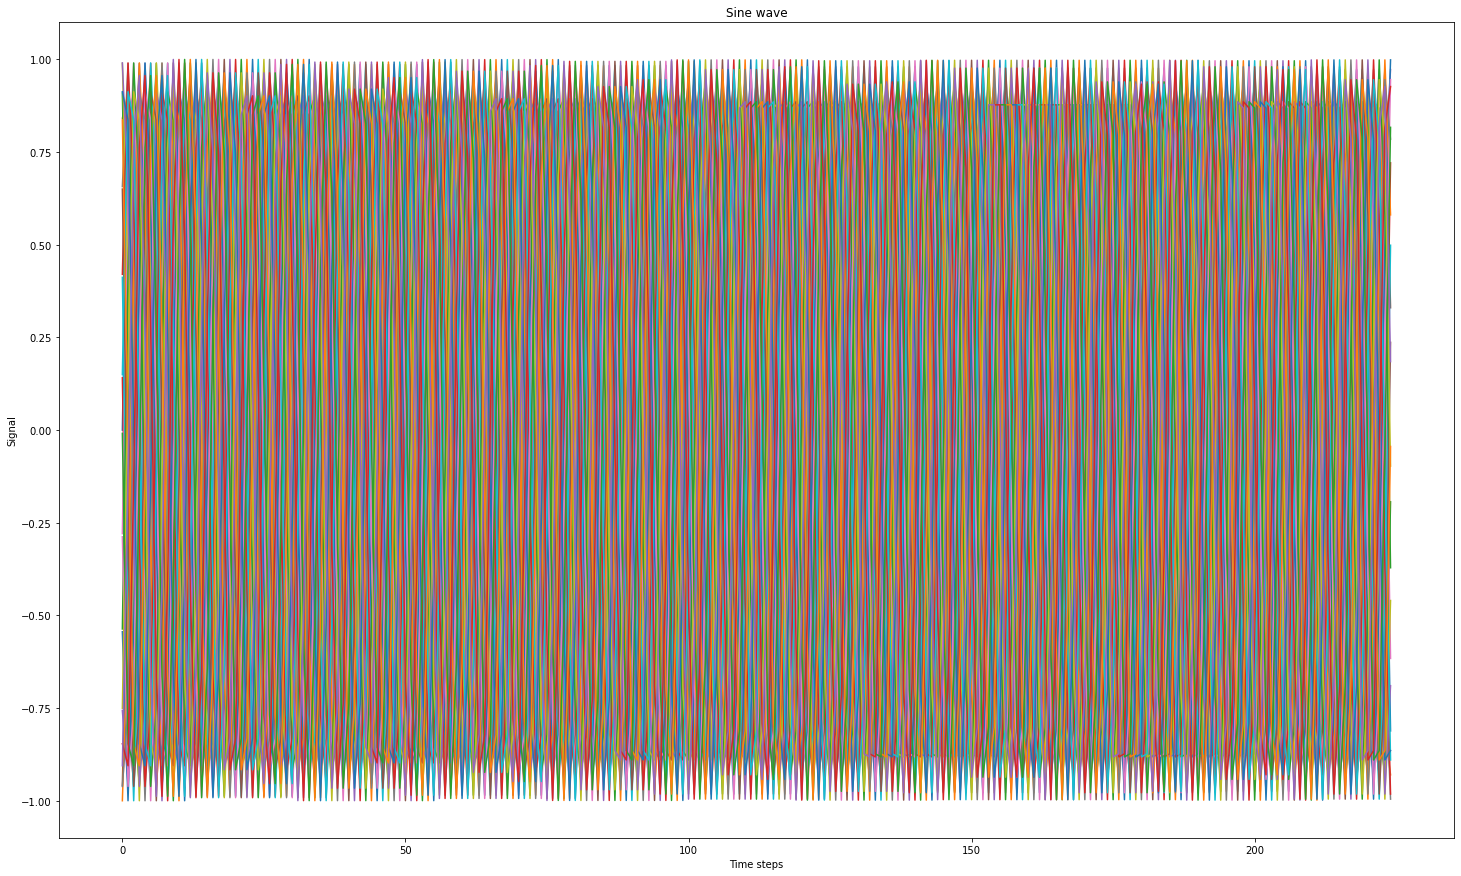

In [3]:
plt.figure(figsize=(25,15))
plt.plot(X)
plt.xlabel("Time steps")
plt.ylabel("Signal")
plt.title("Sine wave")

Text(0.5, 1.0, 'Sine wave')

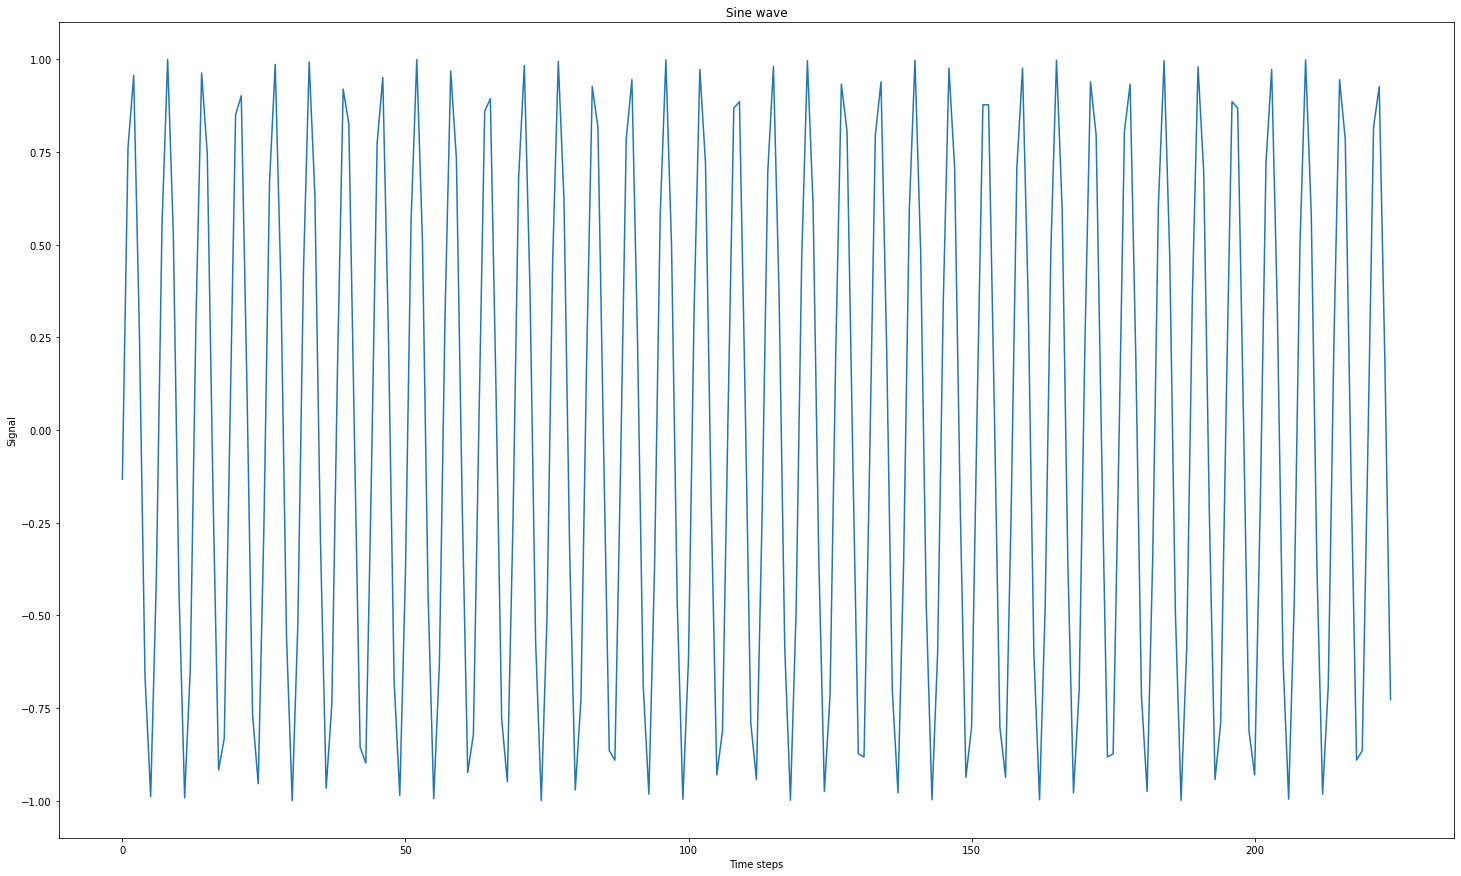

In [4]:
plt.figure(figsize=(25,15))
plt.plot(y)
plt.xlabel("Time steps")
plt.ylabel("Signal")
plt.title("Sine wave")

In [5]:
X = np.array(X).reshape(len(y),time_steps,1)
X.shape

(225, 25, 1)

In [6]:
(225, 25, 1)

(225, 25, 1)

In [7]:
y = np.array(y).reshape(len(y),1)
y.shape

(225, 1)

In [8]:
(225, 1)

(225, 1)

In [9]:
class VanillaRNN:
    def __init__(self, input_size,hidden_size, output_size):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size = hidden_size 
        self.Wx = np.random.randn(self.hidden_size, self.input_size.shape[2])
        self.Wh = np.random.randn(self.hidden_size, self.hidden_size)
        self.Wy = np.random.randn(self.output_size.shape[1],self.hidden_size)
    
    def activation(self, xt, ht_1):
        ht = np.tanh(np.dot(self.Wx,xt.reshape(1,1)) + np.dot(self.Wh,ht_1))
        yt = np.dot(self.Wy,ht)
        return ht, yt
    
    def forward(self, sample):
        sample_input, sample_output = self.input_size[sample], self.output_size[sample]
        ht = np.zeros((self.hidden_size,1)) # since h1 is the initial state make it zero
        self.hidden_states = [ht] 
        self.inputs = []
        for step in range(len(sample_input)):
            ht, yt = self.activation(sample_input[step],ht)
            self.inputs.append(sample_input[step].reshape(1,1))
            self.hidden_states.append(ht)

        self.error = yt - sample_output
        self.loss = 0.5*self.error**2
        self.yt = yt
        
    def backward(self):
        n = len(self.inputs)
        dyt = self.error 
        dWy = np.dot(dyt,self.hidden_states[-1].T)
        dht = np.dot(dyt, self.Wy).T
        dWx = np.zeros(self.Wx.shape)
        dWh = np.zeros(self.Wh.shape)
        
        for step in reversed(range(n)):
            temp = (1-self.hidden_states[step+1]**2) * dht 
            dWx += np.dot(temp, self.inputs[step].T)
            dWh += np.dot(temp, self.hidden_states[step].T) 
            dht = np.dot(self.Wh, temp)
            
        dWy = np.clip(dWy, -1, 1)
        dWx = np.clip(dWx, -1, 1)
        dWh = np.clip(dWh, -1, 1)
        self.Wy -= self.lr * dWy
        self.Wx -= self.lr * dWx
        self.Wh -= self.lr * dWh
    
    def training(self, epochs=10, learning_rate=1e-4):
        self.update = []
        self.lr = learning_rate
        for epoch in range(epochs):
            for sample in range(self.input_size.shape[0]):
                self.forward(sample)
                self.backward()
            self.update.append(np.squeeze(self.loss / self.input_size.shape[0]))
            self.loss = 0
            
    def testing(self,x,y):
        self.x = x
        self.y = y
        self.outputs = []
        for sample in range(len(x)):
            self.forward(sample)
            self.outputs.append(self.yt)

In [10]:
hidden_size = 128
RNN = VanillaRNN(X,hidden_size,y)

In [11]:
RNN.training(15,1e-2)

In [12]:
X_test, y_test = [], []
total_size = 400
time_steps = 25
sin_wave = np.sin(np.arange(total_size))
for step in range(sin_wave.shape[0]-time_steps):
    X_test.append(sin_wave[step:step+time_steps])
    y_test.append(sin_wave[step+time_steps])

In [13]:
X_sample,y_sample = X_test[300:],y_test[300:]

In [14]:
X_sample = np.array(X_sample).reshape(len(y_sample),time_steps,1)
y_sample = np.array(y_sample).reshape(len(y_sample),1)

In [15]:
RNN.testing(X_sample, y_sample)

In [16]:
pred = np.array(RNN.outputs).reshape(y_sample.shape)

In [17]:
len(pred),len(X_sample)

(75, 75)

In [18]:
(75, 75)

(75, 75)

In [19]:
len(RNN.update)

15

In [20]:
15

15

Text(0, 0.5, 'Loss')

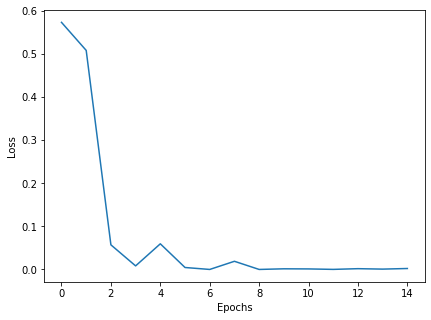

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(RNN.update)
plt.xlabel("Epochs")
plt.ylabel("Loss")

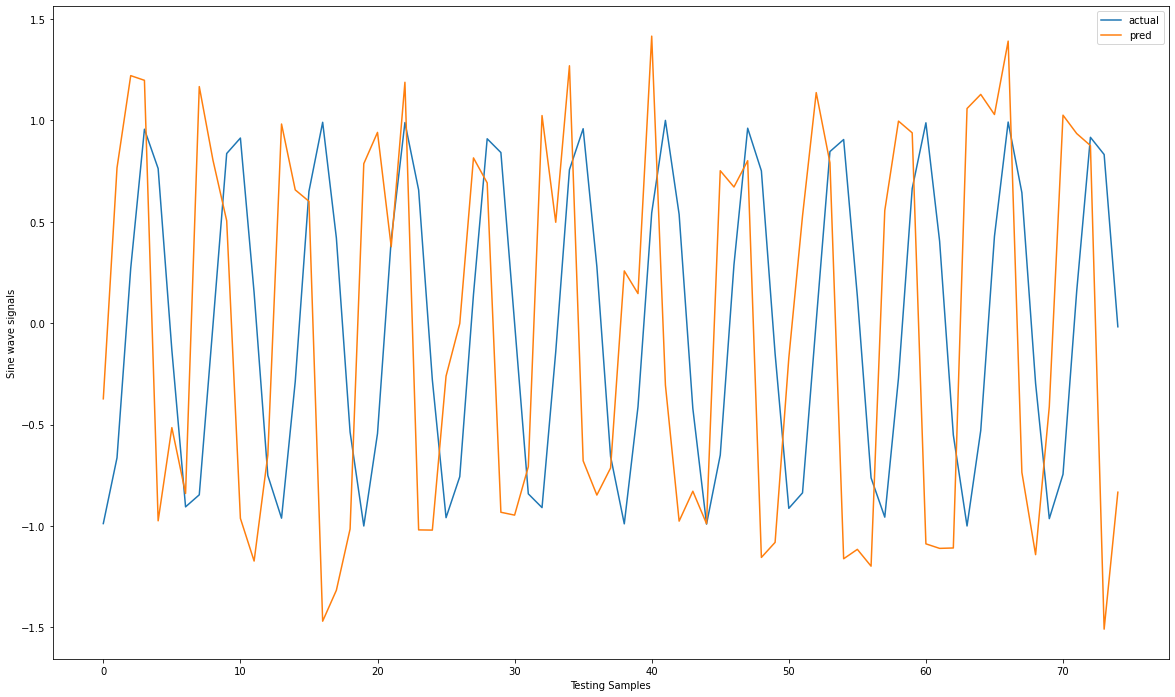

In [22]:
plt.figure(figsize=(20,12))
plt.plot(range(len(X_sample)),y_sample,label="actual")
plt.plot(range(len(X_sample)),pred,label="pred")
plt.xlabel("Testing Samples")
plt.ylabel("Sine wave signals")
plt.legend()